# Loan Prediction

## Problem Description
### The dataset contains entries of loan status of different customers. 
### The task is to predict if a customers loan application would be approved given the attributes in the dataset.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from math import sqrt

### Load the dataset

In [2]:
loan=pd.read_csv('loan_data.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### REplace missing values with the mode of each column

In [4]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:

def fill_with_mode(df, x):
    df[x].fillna(df[x].mode()[0], inplace=True)
    
has_null_objects = ['Gender', 'Married', 'Dependents',
                    'Self_Employed', 'LoanAmount', 'Loan_Amount_Term',
                    'Credit_History']

for obj in has_null_objects:
    fill_with_mode(loan, obj)

In [6]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory data analysis

In [7]:
loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### We can see that out of the 634 entries, 422 got their loans approved and 192 did not.
### Now we will create countplots of gender, marriange status, level of education, self employed, property area and number of dependents.

AxesSubplot(0.125,0.125;0.775x0.755)


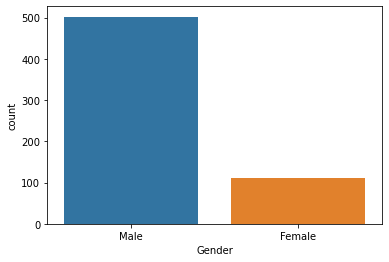

AxesSubplot(0.125,0.125;0.775x0.755)


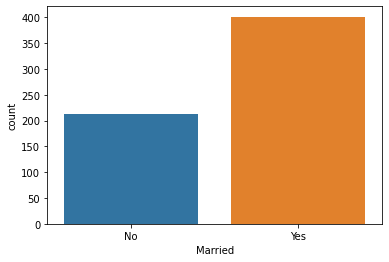

AxesSubplot(0.125,0.125;0.775x0.755)


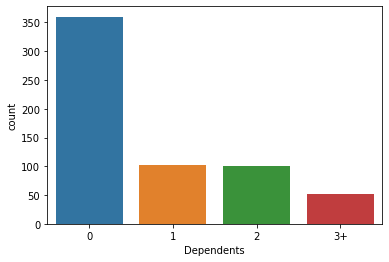

AxesSubplot(0.125,0.125;0.775x0.755)


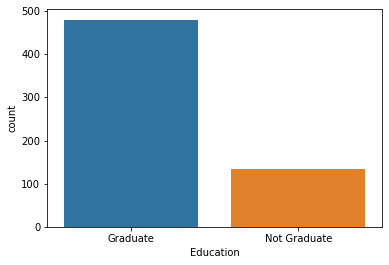

AxesSubplot(0.125,0.125;0.775x0.755)


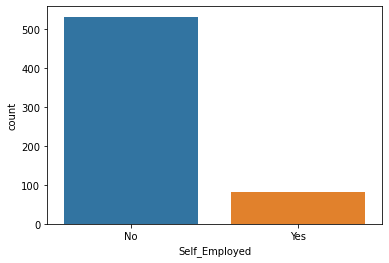

AxesSubplot(0.125,0.125;0.775x0.755)


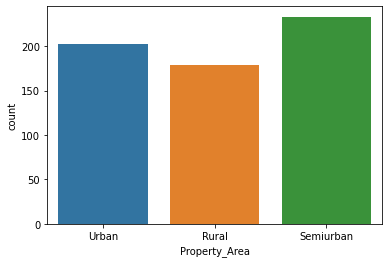

AxesSubplot(0.125,0.125;0.775x0.755)


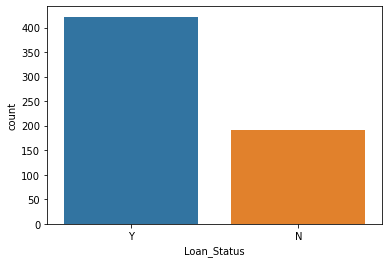

In [8]:
df_obj = loan.select_dtypes(include='object')

for col in df_obj.iloc[:, 1:].columns:
    print(sns.countplot(x=col, data=df_obj))
    plt.show()

### We also need to visualize how these attributes determined the loan approval status

AxesSubplot(0.125,0.125;0.775x0.755)


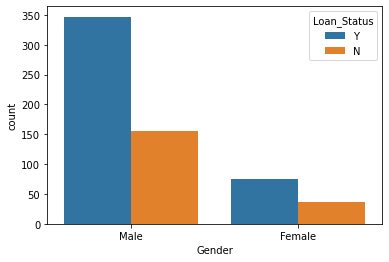

AxesSubplot(0.125,0.125;0.775x0.755)


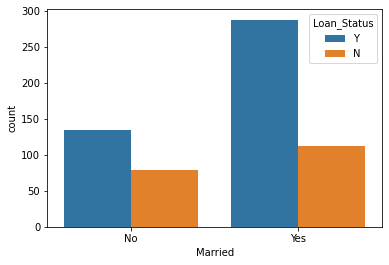

AxesSubplot(0.125,0.125;0.775x0.755)


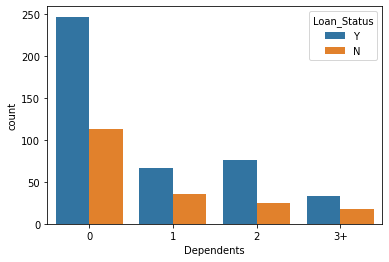

AxesSubplot(0.125,0.125;0.775x0.755)


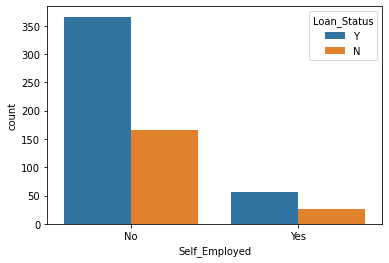

AxesSubplot(0.125,0.125;0.775x0.755)


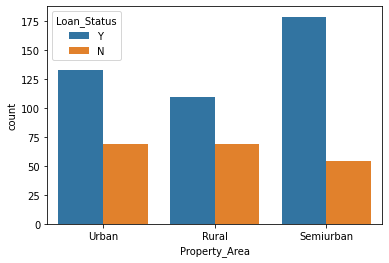

In [9]:
object_variables = ['Gender', 'Married', 'Dependents', 
                   'Self_Employed', 'Property_Area']

for obj in object_variables:
    print(sns.countplot(x=obj, data=df_obj, hue='Loan_Status'))
    plt.show()

## Feature Engineering

## Next we define the input variables (X) and the target variable (y)

In [10]:
X= loan.iloc[:, 1: -1]
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [11]:
y=loan.iloc[:,-1]
y.shape

(614,)

### One-hot encoding using pandas dummies library

In [12]:
onehot_targets = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                  'Property_Area']
for target in onehot_targets:
    onehot_temp=pd.get_dummies(X[target])
    X = X.drop(target, axis=1)
    X = pd.concat([onehot_temp, X], axis=1)

In [13]:
X.head()

,Rural,Semiurban,Urban,No,Yes,Graduate,Not Graduate,0,1,2,3+,No,Yes,Female,Male,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,5849,0.0,120.0,360.0,1.0
1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0
2,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0,1.0
3,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,2583,2358.0,120.0,360.0,1.0
4,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,6000,0.0,141.0,360.0,1.0


### Target encoding of target variable

In [14]:
le=preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Machine learning
### We will be using the following models:
    Logistic Regression
    K-Nearest neighbour
    Random forest classifier
    Decision tree classifier
    Gaussian Bayes
    Support vector Machine

In [16]:
logreg=LogisticRegression()
knn= KNeighborsClassifier(n_neighbors=5)
rf=RandomForestClassifier(n_estimators=100)
dt = DecisionTreeClassifier()
nb = GaussianNB()
svc = svm.SVC()


In [17]:
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)


logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)


rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)



dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)


nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)


svc = svm.SVC()
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)


print('K NEAREST NEIGHBOURS:: ',metrics.accuracy_score(y_pred_knn,y_test))

print('LOGISTIC REGRESSION:: ',metrics.accuracy_score(y_pred_logreg,y_test))

print('RANDOM FORSEST CLASSIFICATION:: ',metrics.accuracy_score(y_pred_rf,y_test))

print('DECISION TREE CLASSIFIER:: ',metrics.accuracy_score(y_pred_dt,y_test))

print('NAIVE BAYES ALGORITHM:: ',metrics.accuracy_score(y_pred_nb,y_test))

print('SUPPORT VECTOR MACHINE:: ',metrics.accuracy_score(y_pred_svc,y_test))

K NEAREST NEIGHBOURS::  0.6422764227642277
LOGISTIC REGRESSION::  0.7967479674796748
RANDOM FORSEST CLASSIFICATION::  0.7967479674796748
DECISION TREE CLASSIFIER::  0.6829268292682927
NAIVE BAYES ALGORITHM::  0.8292682926829268
SUPPORT VECTOR MACHINE::  0.7317073170731707


## We will proceed to increase the accuracy of each of the models

## 1. Logistic regression model

In [18]:
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_logreg))

0.7967479674796748


## Feature selection (Logistic regression)

In [19]:
smf=SelectFromModel(logreg, max_features=10)
smf.fit(X_train, y_train)
feature_idx=smf.get_support()
feature_name= X.columns[feature_idx]
feature_name

Index(['Rural', 'Semiurban', 'Graduate', 'No', 'Yes', 'Credit_History'], dtype='object')

In [20]:
X_logreg= X[['Rural', 'Semiurban', 'Graduate', 'No', 'Yes', 'Credit_History']]
X_logreg_train, X_logreg_test, y_train, y_test = train_test_split(X_logreg, y, test_size=0.2, random_state=0)
logreg.fit(X_logreg_train,y_train)
y_pred_logreg_fs=logreg.predict(X_logreg_test)
print(metrics.accuracy_score(y_test,y_pred_logreg_fs))

0.8292682926829268


## Hyperparameter tuning (Logistic regression)

In [21]:
penalty= ['l1', 'l2', 'elasticnet', 'none']
C = [int(x) for x in np.linspace(start=10, stop=700, num=10)]
solver= ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

random_grid = {'penalty': penalty, 'C':C, 'solver': solver}
rf_random = RandomizedSearchCV(estimator=logreg, param_distributions=random_grid, n_iter=100,
                              cv=5, verbose=2, random_state=42, n_jobs=-1)

In [22]:
rf_random.fit(X, y)
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   17.5s finished


{'solver': 'newton-cg', 'penalty': 'none', 'C': 316}

In [23]:
logreg_new= LogisticRegression(solver= 'newton-cg', penalty='none', C=316)

In [24]:
logreg_new.fit(X_train,y_train)
y_pred_logreg_new=logreg_new.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_logreg_new))

0.8373983739837398


In [25]:
print('LOGISTIC REGRESSION MODEL')
print('MODEL WITHOUT TUNING OR FEATURE SELECTION::', 
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_logreg),
        'RMSE=',sqrt(metrics.mean_squared_error(y_test,y_pred_logreg )))
print('--------------------------------------------------------------------')
print(  'AFTER FEATURE SELECTION::',
        'ACCURACY SCORE=',metrics.accuracy_score(y_test,y_pred_logreg_fs),
        'RMSE=', sqrt(metrics.mean_squared_error(y_test,y_pred_logreg_fs)))
print('--------------------------------------------------------------------')
print('AFTER HYPERPARAMETER TUNING::',
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_logreg_new),
        'RMSE=', sqrt(metrics.mean_squared_error (y_test,y_pred_logreg_new)))

LOGISTIC REGRESSION MODEL
MODEL WITHOUT TUNING OR FEATURE SELECTION:: ACCURACY SCORE= 0.7967479674796748 RMSE= 0.45083481733371616
--------------------------------------------------------------------
AFTER FEATURE SELECTION:: ACCURACY SCORE= 0.8292682926829268 RMSE= 0.4131969352706687
--------------------------------------------------------------------
AFTER HYPERPARAMETER TUNING:: ACCURACY SCORE= 0.8373983739837398 RMSE= 0.4032389192727559


## 2. Random Forest Classifier model

In [26]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_rf))

0.7804878048780488


## Feature selection (Random forest)

In [27]:
smf=SelectFromModel(rf, max_features=10)
smf.fit(X_train, y_train)
feature_idx=smf.get_support()
feature_name= X.columns[feature_idx]
feature_name

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History'], dtype='object')

In [28]:
X_rf= X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']]
X_rf_train, X_rf_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=0)
rf.fit(X_rf_train,y_train)
y_pred_rf_fs=rf.predict(X_rf_test)
print(metrics.accuracy_score(y_test,y_pred_rf_fs))

0.7804878048780488


## Hyperparameter tuining (random forest)

In [29]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2,                                       random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.8min finished


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [30]:
rf_new=RandomForestClassifier(n_estimators= 600, min_samples_split= 2, min_samples_leaf= 4, max_features= 'auto',                                       max_depth= 40, bootstrap= True)

In [31]:
rf_new.fit(X_train,y_train)
y_pred_rf_new=rf_new.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_rf_new))

0.8292682926829268


In [32]:
print('RANDOM FOREST CLASSIFIER MODEL')
print('MODEL WITHOUT TUNING OR FEATURE SELECTION::', 
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_rf),
        'RMSE=',sqrt(metrics.mean_squared_error(y_test,y_pred_rf )))
print('--------------------------------------------------------------------')
print(  'AFTER FEATURE SELECTION::',
        'ACCURACY SCORE=',metrics.accuracy_score(y_test,y_pred_rf_fs),
        'RMSE=', sqrt(metrics.mean_squared_error(y_test,y_pred_rf_fs)))
print('--------------------------------------------------------------------')
print('AFTER HYPERPARAMETER TUNING::',
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_rf_new),
        'RMSE=', sqrt(metrics.mean_squared_error (y_test,y_pred_rf_new)))

RANDOM FOREST CLASSIFIER MODEL
MODEL WITHOUT TUNING OR FEATURE SELECTION:: ACCURACY SCORE= 0.7804878048780488 RMSE= 0.4685212856658182
--------------------------------------------------------------------
AFTER FEATURE SELECTION:: ACCURACY SCORE= 0.7804878048780488 RMSE= 0.4685212856658182
--------------------------------------------------------------------
AFTER HYPERPARAMETER TUNING:: ACCURACY SCORE= 0.8292682926829268 RMSE= 0.4131969352706687


## 3. Decision tree Model

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print(metrics.accuracy_score(y_pred_dt,y_test))

0.6585365853658537


## Feature selection (Decision tree)

In [34]:
smf=SelectFromModel(dt, max_features=10)
smf.fit(X_train, y_train)
feature_idx=smf.get_support()
feature_name= X.columns[feature_idx]
feature_name

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [35]:
X_dt= X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']]
X_dt_train, X_dt_test, y_train, y_test = train_test_split(X_dt, y, test_size=0.2, random_state=0)
dt.fit(X_rf_train,y_train)
y_pred_dt_fs=rf.predict(X_dt_test)
print(metrics.accuracy_score(y_test,y_pred_dt_fs))

0.7804878048780488


## Hyperparameter tuining (Decision tree)

In [36]:

criterion = ['gini', 'entropy']
max_depth = [4,6,8,12]
min_samples_leaf = [1, 2, 4]
random_grid={'criterion': criterion,
            'max_depth': max_depth,
            'min_samples_leaf':min_samples_leaf}
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2,                                       random_state=42, n_jobs = -1)
dt_random.fit(X_train, y_train)
dt_random.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.6s finished


{'min_samples_leaf': 4, 'max_depth': 4, 'criterion': 'entropy'}

In [37]:
dt_new = DecisionTreeClassifier(min_samples_leaf= 4, max_depth= 4, criterion= 'entropy')

In [38]:
dt_new.fit(X_train,y_train)
y_pred_dt_new=dt_new.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_dt_new))

0.8048780487804879


In [39]:
print('DECISION TREE MODEL')
print('MODEL WITHOUT TUNING OR FEATURE SELECTION::', 
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_dt),
        'RMSE=',sqrt(metrics.mean_squared_error(y_test,y_pred_dt )))
print('--------------------------------------------------------------------')
print(  'AFTER FEATURE SELECTION::',
        'ACCURACY SCORE=',metrics.accuracy_score(y_test,y_pred_dt_fs),
        'RMSE=', sqrt(metrics.mean_squared_error(y_test,y_pred_dt_fs)))
print('--------------------------------------------------------------------')
print('AFTER HYPERPARAMETER TUNING::',
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_dt_new),
        'RMSE=', sqrt(metrics.mean_squared_error (y_test,y_pred_dt_new)))

DECISION TREE MODEL
MODEL WITHOUT TUNING OR FEATURE SELECTION:: ACCURACY SCORE= 0.6585365853658537 RMSE= 0.5843487097907776
--------------------------------------------------------------------
AFTER FEATURE SELECTION:: ACCURACY SCORE= 0.7804878048780488 RMSE= 0.4685212856658182
--------------------------------------------------------------------
AFTER HYPERPARAMETER TUNING:: ACCURACY SCORE= 0.8048780487804879 RMSE= 0.4417261042993862


## 4. K-nearest Neighbors model

In [40]:
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_knn))

0.6422764227642277


## Hyperparameter tuning (KNN)

In [41]:
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

knn_grid = GridSearchCV(knn, param_grid=params, n_jobs=1)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_jobs': -1,
 'n_neighbors': 9,
 'weights': 'uniform'}

In [42]:
knn_new= KNeighborsClassifier(algorithm ='auto', leaf_size=1, n_jobs= -1, n_neighbors=9, weights='uniform')

In [43]:
knn_new.fit(X_train,y_train)
y_pred_knn_new=knn_new.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_knn_new))

0.6747967479674797


In [44]:
print('K-NEAREST NEIGHBORS MODEL')
print('MODEL WITHOUT TUNING OR FEATURE SELECTION::', 
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_knn),
        'RMSE=',sqrt(metrics.mean_squared_error(y_test,y_pred_knn )))

print('--------------------------------------------------------------------')
print('AFTER HYPERPARAMETER TUNING::',
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_knn_new),
        'RMSE=', sqrt(metrics.mean_squared_error (y_test,y_pred_knn_new)))

K-NEAREST NEIGHBORS MODEL
MODEL WITHOUT TUNING OR FEATURE SELECTION:: ACCURACY SCORE= 0.6422764227642277 RMSE= 0.5980999726097406
--------------------------------------------------------------------
AFTER HYPERPARAMETER TUNING:: ACCURACY SCORE= 0.6747967479674797 RMSE= 0.570265948512201


In [47]:
print('LOGISTIC REGRESSION MODEL')
print('MODEL WITHOUT TUNING OR FEATURE SELECTION::', 
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_logreg),
        'RMSE=',sqrt(metrics.mean_squared_error(y_test,y_pred_logreg )))
print('')
print(  'AFTER FEATURE SELECTION::',
        'ACCURACY SCORE=',metrics.accuracy_score(y_test,y_pred_logreg_fs),
        'RMSE=', sqrt(metrics.mean_squared_error(y_test,y_pred_logreg_fs)))
print('')
print('AFTER HYPERPARAMETER TUNING::',
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_logreg_new),
        'RMSE=', sqrt(metrics.mean_squared_error (y_test,y_pred_logreg_new)))

print('--------------------------------------------------------------------')


print('RANDOM FOREST CLASSIFIER MODEL')
print('MODEL WITHOUT TUNING OR FEATURE SELECTION::', 
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_rf),
        'RMSE=',sqrt(metrics.mean_squared_error(y_test,y_pred_rf )))
print('')
print(  'AFTER FEATURE SELECTION::',
        'ACCURACY SCORE=',metrics.accuracy_score(y_test,y_pred_rf_fs),
        'RMSE=', sqrt(metrics.mean_squared_error(y_test,y_pred_rf_fs)))
print('')
print('AFTER HYPERPARAMETER TUNING::',
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_rf_new),
        'RMSE=', sqrt(metrics.mean_squared_error (y_test,y_pred_rf_new)))

print('--------------------------------------------------------------------')

print('DECISION TREE MODEL')
print('MODEL WITHOUT TUNING OR FEATURE SELECTION::', 
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_dt),
        'RMSE=',sqrt(metrics.mean_squared_error(y_test,y_pred_dt )))
print('')
print(  'AFTER FEATURE SELECTION::',
        'ACCURACY SCORE=',metrics.accuracy_score(y_test,y_pred_dt_fs),
        'RMSE=', sqrt(metrics.mean_squared_error(y_test,y_pred_dt_fs)))
print('')
print('AFTER HYPERPARAMETER TUNING::',
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_dt_new),
        'RMSE=', sqrt(metrics.mean_squared_error (y_test,y_pred_dt_new)))

print('--------------------------------------------------------------------')

print('K-NEAREST NEIGHBORS MODEL')
print('MODEL WITHOUT TUNING OR FEATURE SELECTION::', 
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_knn),
        'RMSE=',sqrt(metrics.mean_squared_error(y_test,y_pred_knn )))

print('')
print('AFTER HYPERPARAMETER TUNING::',
        'ACCURACY SCORE=', metrics.accuracy_score(y_test,y_pred_knn_new),
        'RMSE=', sqrt(metrics.mean_squared_error (y_test,y_pred_knn_new)))

print('--------------------------------------------------------------------')

print('NAIVE BAYES ALGORITHM:: ',metrics.accuracy_score(y_pred_nb,y_test))

print('--------------------------------------------------------------------')

print('SUPPORT VECTOR MACHINE:: ',metrics.accuracy_score(y_pred_svc,y_test))

LOGISTIC REGRESSION MODEL
MODEL WITHOUT TUNING OR FEATURE SELECTION:: ACCURACY SCORE= 0.7967479674796748 RMSE= 0.45083481733371616

AFTER FEATURE SELECTION:: ACCURACY SCORE= 0.8292682926829268 RMSE= 0.4131969352706687

AFTER HYPERPARAMETER TUNING:: ACCURACY SCORE= 0.8373983739837398 RMSE= 0.4032389192727559
--------------------------------------------------------------------
RANDOM FOREST CLASSIFIER MODEL
MODEL WITHOUT TUNING OR FEATURE SELECTION:: ACCURACY SCORE= 0.7804878048780488 RMSE= 0.4685212856658182

AFTER FEATURE SELECTION:: ACCURACY SCORE= 0.7804878048780488 RMSE= 0.4685212856658182

AFTER HYPERPARAMETER TUNING:: ACCURACY SCORE= 0.8292682926829268 RMSE= 0.4131969352706687
--------------------------------------------------------------------
DECISION TREE MODEL
MODEL WITHOUT TUNING OR FEATURE SELECTION:: ACCURACY SCORE= 0.6585365853658537 RMSE= 0.5843487097907776

AFTER FEATURE SELECTION:: ACCURACY SCORE= 0.7804878048780488 RMSE= 0.4685212856658182

AFTER HYPERPARAMETER TUNING:

## Logistic regression proved to be the best model with about 83% accuracy after feature selection and hyperparameter tuning.